# IADS final exam 2023

## Theoretic part

## Question 1 (5pts).
Imagine training a model that considers multiple street segments and aims to predict the traffic based on the known characteristics of the street segments. Some of the street segments from the training sample have the observed amount of traffic specified for them, others do not. How would you classify this problem from the Machine Learning perspective?

A. Supervised learning;

B. Unsupervised learning;

C. Semi-supervised learning;

D. Reinforcement learning.

Explain your choice:

### Answer: Semi-supervised
#### It is not a reinforcement or unsupervised learning since we have some labeled data. Also, since we don't have the label for all of the data it is not supervised learning the problem is semi-supervised learning.

## Question 2 (5pts).
Regression $y\sim a_1 x_1 + a_2 x_2 +a_3 x_3$ have p-value of $0.03$ for $x_1$, $0.3$ for $x_2$ and $0.15$ for $x_3$. Does it mean that (select all that apply):

A. Impact of $x_3$ is twice stronger than impact of $x_2$.

B. Regressors $x_2$ and $x_3$ are irrelevant.

C. One could reject the null-hypothesis $a_j=0$ only for $j=1$ but not for $j=2$ and $j=3$ at 95% singificance level.

D. The estimated value of $a_1$ is statistically significant.

E. 95%-confidence indervals for $a_2$ and $a_3$ should contain zero.

#### Answer: Based on our level of significance (which is assumed to be 0.05) the C and E are correct


## Question 3 (5pts).
Which of the following statements (select all that apply) are true about overfitting problem for linear regression:

A. Overfitting problem could be detected by R-squared if the in-sample R-squared
is very low.

B. Overfitting problem often happens when we do not have enough features but a big
number of observations.

C. Overfitting problem could be detected by R-squared if the out-of-sample R-
squared is very low.

D. Overfitting problem could happen when we have many noisy features but a
small number of observations.

E. Overfitting problem could be detected by R-squared if the out-of-sample R-
squared is considerably lower compared to in-sample R-squared.

Explain how do you understand the concept of overfitting in general and in the context of your answer.

#### D: This is right
#### E: This is right
#### Overfitting happens we a model fits too much to the training set and can't perform on a part of a dataset that was not trained on so the in-sample accuracy is much higher than out-of-sample accuracy and this might happen if we have a lot of training features and a small number of observation or having a too much complex model with limited number of data 

## Question 4 (5pts).
You trained the regression model with 100 regressors and 1000 observations in the training and another 1000 in the test sample. You found that in-sample R2 over the training sample is 70\% and the out-of-sample R2 over the test sample only - 30\%.

a) Do you think there is any problem and how would you characterize it? Can adding more regressors (if you have them) help the model?

b) Which approaches you may use to solve the problem?

c) Would you expect the in-sample R2 to increase or decrease after that applying suggested approaches from step b)? What about the out-of-sample (test) R2?

#### a) It seems like the model overfits the data and adding more regressors worsens the current problem b) we can use less number of regressors and a simpler model for this dataset. we also can change the percentage of train and test datasets to 70 % for all the data and 30 % for the test. C) I think by applying the suggested approaches the in-sample R2 decreases and out-of-sample R2 increases.

In [788]:
# import packages
import numpy as np
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
import datetime as dt
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_ind, norm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
# suppress warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Traffic Modeling for Real-Time Autonomous Vehicle Solutions in LGA

Transportation network models are essential to transportation operations and planning. A simple yet well-designed linear model can provide us insights into the traffic demand. We are going to model the outgoing traffic around LGA, one of the busiest transportation hubs in NYC.
In this test, you'll be asked to:
* Find possible correlations from observations
* Incorporate time patterns using dummy variables
* Run and diagnose linear models, in-sample and out-of-sample. Perform feature selection
* Cluster the days based on their ridership patterns to see if we can detect any outliers

We will be importing the dataset `LGAVehicleByHour.csv`,`LGAFlightArrival` providing FHV and taxi ridership and arrivals at the airport aggregated on the hourly basis:
* `vehicle_count`: Number of FHV (For Hire Vehicle) and taxi departing from LGA. This is our target variable.
* `arrivals`: Number of incoming domestic flights arriving LGA, which is assumed to provide a basis for future FHV and taxi demand

In [789]:
# import and curate the dataset
TaxiRidership = pd.read_csv("https://raw.githubusercontent.com/CUSP2020PUI/Data/master/LGAVehicleByHour.csv")
FlightArrival = pd.read_csv("https://raw.githubusercontent.com/CUSP2020PUI/Data/master/LGAFlightArrival.csv")

In [790]:
TaxiRidership.head()

,DOLocationID,Date,vehicle_count
0,1,2018-01-01 00:00,0.0
1,2,2018-01-01 00:00,0.0
2,3,2018-01-01 00:00,0.0
3,4,2018-01-01 00:00,0.0
4,5,2018-01-01 00:00,0.0


In [791]:
FlightArrival.head()

,Date,arrivals
0,18/1/1 0:00,3
1,18/1/1 1:00,0
2,18/1/1 2:00,1
3,18/1/1 3:00,0
4,18/1/1 4:00,0


In [792]:
# convert the `date` feature into `dt.datetime` format. This is for later creating dummy variables
TaxiRidership.Date = pd.to_datetime(TaxiRidership.Date)
FlightArrival.Date = pd.to_datetime(FlightArrival.Date, format='%y/%m/%d %H:%M')
FlightArrival.head()

,Date,arrivals
0,2018-01-01 00:00:00,3
1,2018-01-01 01:00:00,0
2,2018-01-01 02:00:00,1
3,2018-01-01 03:00:00,0
4,2018-01-01 04:00:00,0


In [793]:
#get day of the week; monday - 0, sunday - 6
TaxiRidership['DOW']=pd.DatetimeIndex(TaxiRidership.Date).weekday

In [794]:
#get day from beginning of the year, hour and day of the week from datetime
TaxiRidership['Hour']=pd.DatetimeIndex(TaxiRidership.Date).hour

In [795]:
#get day from beginning of the year
TaxiRidership['day']=((TaxiRidership.Date-dt.datetime(2018,1,1))/dt.timedelta(days = 1)).astype(int)

## Task 1. Spatial visualization (10pts)

### Q1. Spatial distribution of total ridership from LGA on each day of week. Using colormap 'RdBu_r', bonus on if you plot 7 plots on the same colormap scale (+3pts).

In [796]:
#upload the shapefile; The 'location_i' column consists of all taxi zones within NYC + Newark airport
taxi = gpd.read_file('https://data.cityofnewyork.us/api/geospatial/d3c5-ddgc?method=export&format=Shapefile')
taxi.head()

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."


<Axes: >

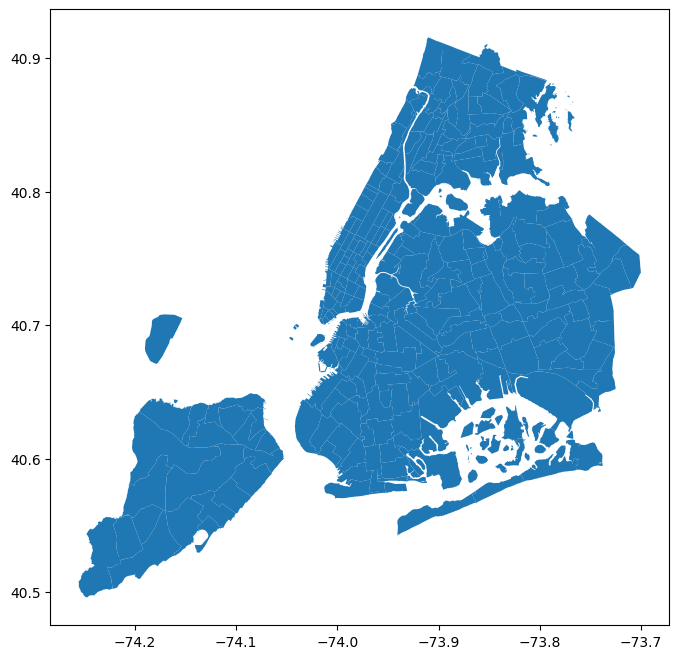

In [797]:
taxi.plot(figsize=(8,8))

In [798]:
TaxiRidership.head()

,DOLocationID,Date,vehicle_count,DOW,Hour,day
0,1,2018-01-01,0.0,0,0,0
1,2,2018-01-01,0.0,0,0,0
2,3,2018-01-01,0.0,0,0,0
3,4,2018-01-01,0.0,0,0,0
4,5,2018-01-01,0.0,0,0,0


In [799]:
# Grouping by 'DOLocationID' and 'DOW', and summing 'vehicle_count'
grouped_df = TaxiRidership.groupby(['DOLocationID', 'DOW'])['vehicle_count'].sum().reset_index()
grouped_df.head()

,DOLocationID,DOW,vehicle_count
0,1,0,1049.0
1,1,1,1020.0
2,1,2,969.0
3,1,3,1009.0
4,1,4,1294.0


In [800]:
merged_df = pd.merge(grouped_df, taxi, left_on='DOLocationID', right_on='location_i', how='left')
merged_df.head()

,DOLocationID,DOW,vehicle_count,borough,location_i,objectid,shape_area,shape_leng,zone,geometry
0,1,0,1049.0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,1,1,1020.0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
2,1,2,969.0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
3,1,3,1009.0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
4,1,4,1294.0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."


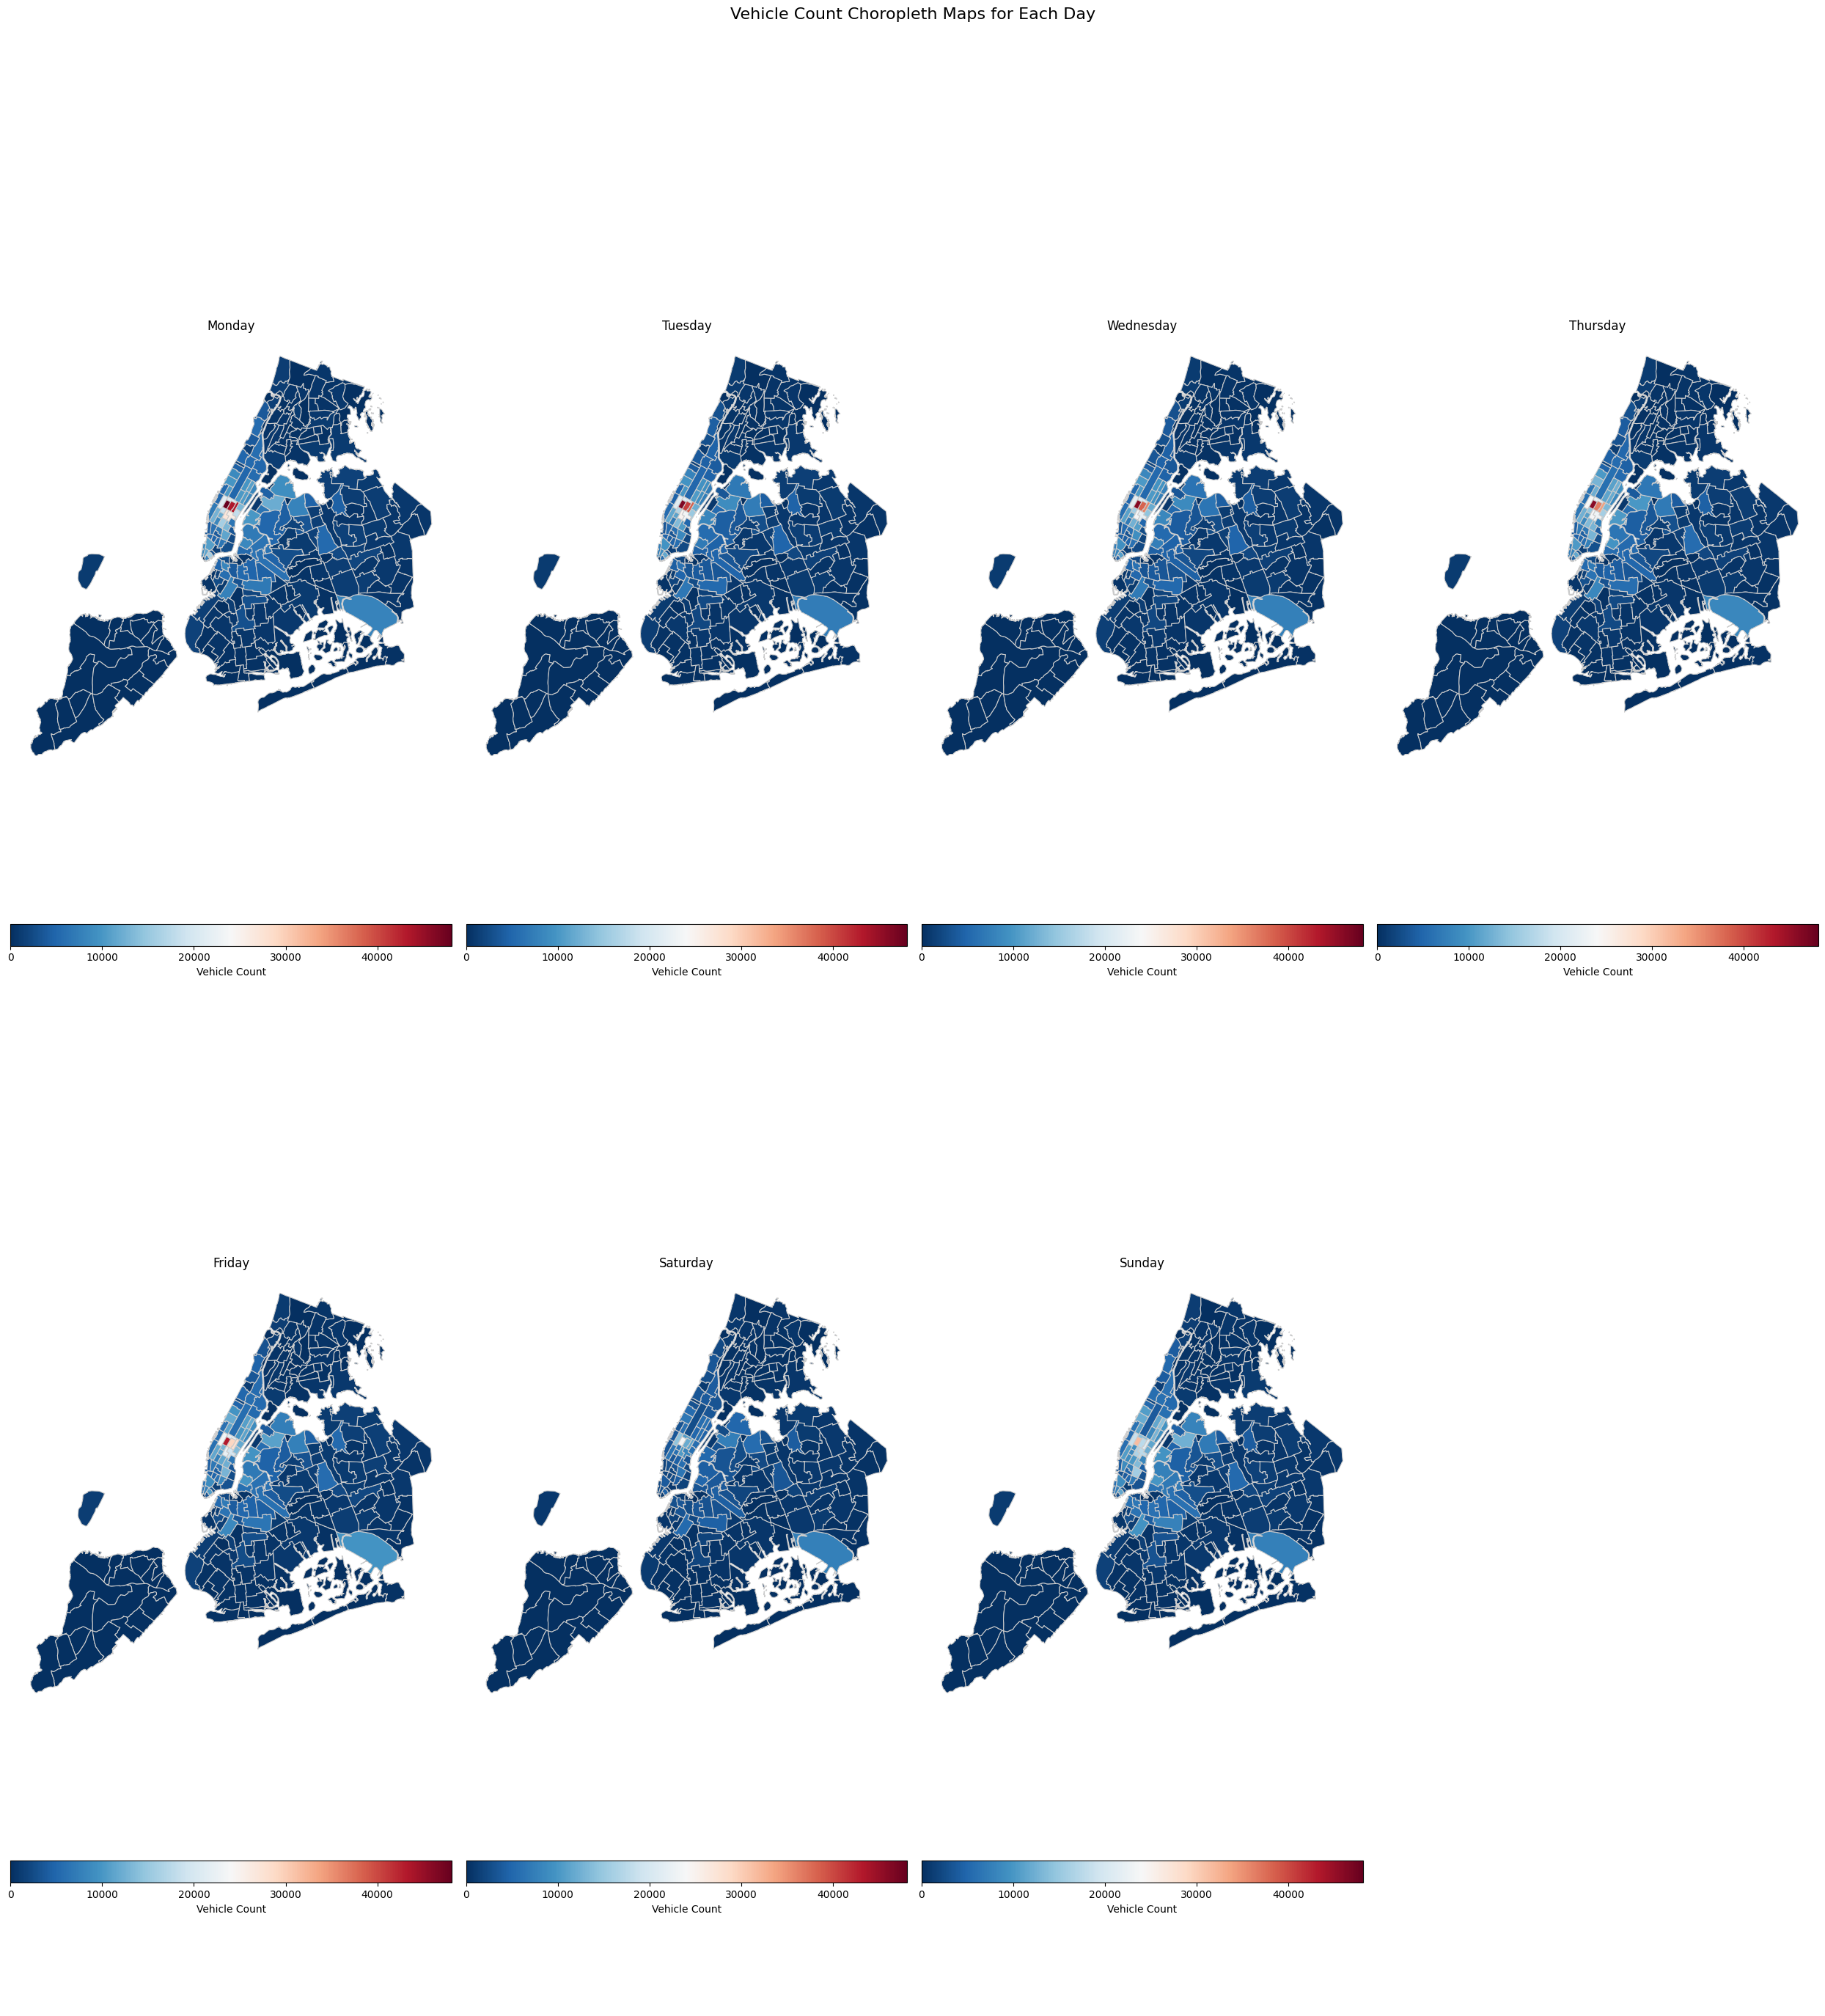

In [801]:
days_of_week = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
vmin, vmax = merged_df['vehicle_count'].min(), merged_df['vehicle_count'].max()

# Set up the figure and axis outside the loop
fig, axs = plt.subplots(2, 4, figsize=(25, 28))  
fig.suptitle('Vehicle Count Choropleth Maps for Each Day', fontsize=16)

for day in range(7):
    # Compute the row and column index for the subplot
    row_index = day // 4
    col_index = day % 4

    # Filter the GeoDataFrame based on the condition
    filtered_df = merged_df[merged_df['DOW'] == day]
    gdf = gpd.GeoDataFrame(filtered_df, geometry='geometry')

    # Plot the GeoDataFrame using the 'vehicle_count' column for coloring
    gdf.plot(column='vehicle_count',
             cmap='RdBu_r',
             linewidth=0.8,
             ax=axs[row_index, col_index],  # Specify the correct subplot
             edgecolor='0.8',  # Specify edge color for polygons
             legend=True,
             legend_kwds={'label': "Vehicle Count",
                          'orientation': "horizontal"},
             vmin=vmin,  # Set the same vmin for all plots
             vmax=vmax)  # Set the same vmax for all plots

    axs[row_index, col_index].set_title(days_of_week[day])  # Set the title using the day name
    axs[row_index, col_index].set_axis_off()

# Hide the eighth subplot (bottom-right corner)
axs[1, 3].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

## Task 2: Data preprocessing (10pts)

### Q1. aggregate ridership to date-hour level (over the entire city for all the drop off locations aggregated together), merge with the flight arrival data (5pts)
Note: date-hour level means that you have to find the count for every hour of the day for each day.
Hint: you may need to precess data format in two datasets before merge.

In [802]:
# Format the "Date" column as desired

FlightArrival.head()

,Date,arrivals
0,2018-01-01 00:00:00,3
1,2018-01-01 01:00:00,0
2,2018-01-01 02:00:00,1
3,2018-01-01 03:00:00,0
4,2018-01-01 04:00:00,0


In [803]:
TaxiRidership.head()

,DOLocationID,Date,vehicle_count,DOW,Hour,day
0,1,2018-01-01,0.0,0,0,0
1,2,2018-01-01,0.0,0,0,0
2,3,2018-01-01,0.0,0,0,0
3,4,2018-01-01,0.0,0,0,0
4,5,2018-01-01,0.0,0,0,0


In [804]:
grouped_df = TaxiRidership.groupby(['Date' ])['vehicle_count'].sum().reset_index()
grouped_df.set_index('Date', inplace=True)
grouped_df.head()

,vehicle_count
Date,
2018-01-01 00:00:00,142.0
2018-01-01 01:00:00,23.0
2018-01-01 02:00:00,2.0
2018-01-01 03:00:00,1.0
2018-01-01 04:00:00,13.0


In [805]:
merged_df = pd.merge(grouped_df, FlightArrival, left_on='Date', right_on='Date', how='left')
merged_df.head()

,Date,vehicle_count,arrivals
0,2018-01-01 00:00:00,142.0,3
1,2018-01-01 01:00:00,23.0,0
2,2018-01-01 02:00:00,2.0,1
3,2018-01-01 03:00:00,1.0,0
4,2018-01-01 04:00:00,13.0,0


### Q2. add time-lagged arrivals (1,2,3,4,5,6..12 hours before) - 5pts

Taxi and FHV ridership volume is impacted by flight arrivals. Intuitively, more flights bring more passengers, and more ridership eventually. However, the hourly ridership volume may not only be related to flight arrivals in the same hour, arrivals 1 hour, 2 hours ago could impact ridership as well, as travelers need some time to pass the customs or wait for luggage. Please add lag of `arrivals` as additional features, and name new features as `lag1` for `arrivals` 1 hour ago, and `lag2` for 2 hours before and so on. You may use the `shift` function in pandas to add arrivals lag values. For example, df['arrivals'].shift(1) means adding 1 hour lag value of arrivals. `iloc` function works as well.

In [806]:
#  the number of lagged columns 
num_lags = 12
# Create lagged columns for 'arrivals'
for i in range(1, num_lags + 1):
    merged_df[f'arrivals_lag_{i}'] = merged_df['arrivals'].shift(i)
merged_df.head(5)

,Date,vehicle_count,arrivals,arrivals_lag_1,arrivals_lag_2,arrivals_lag_3,arrivals_lag_4,arrivals_lag_5,arrivals_lag_6,arrivals_lag_7,arrivals_lag_8,arrivals_lag_9,arrivals_lag_10,arrivals_lag_11,arrivals_lag_12
0,2018-01-01 00:00:00,142.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 01:00:00,23.0,0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 02:00:00,2.0,1,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 03:00:00,1.0,0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 04:00:00,13.0,0,0.0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Task 3. Data Exploration (20pts)

### Q1 (5pts). Print some dataset characteristics: number of records, the total number of FHV and taxi trips, total number of arriving flights


In [807]:
# number of records
len(merged_df)

8760

In [808]:
#total number of FHV and taxi trips
merged_df['vehicle_count'].sum()

5430922.0

In [809]:
#total number of arriving flights
merged_df['arrivals'].sum()

163713

In [810]:
# to have a better understanding of the dataset
merged_df.describe()

,Date,vehicle_count,arrivals,arrivals_lag_1,arrivals_lag_2,arrivals_lag_3,arrivals_lag_4,arrivals_lag_5,arrivals_lag_6,arrivals_lag_7,arrivals_lag_8,arrivals_lag_9,arrivals_lag_10,arrivals_lag_11,arrivals_lag_12
count,8760,8760.000000,8760.000000,8759.000000,8758.000000,8757.000000,8756.000000,8755.000000,8754.000000,8753.000000,8752.000000,8751.000000,8750.000000,8749.000000,8748.000000
mean,2018-07-02 11:30:00,619.968265,18.688699,18.689805,18.691025,18.692246,18.692896,18.693775,18.694540,18.694276,18.694127,18.694321,18.694057,18.693108,18.693301
min,2018-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-04-02 05:45:00,81.750000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,2018-07-02 11:30:00,684.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
75%,2018-10-01 17:15:00,988.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
max,2018-12-31 23:00:00,2028.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
std,NaN,451.871984,13.332222,13.332582,13.332853,13.333125,13.333748,13.334256,13.334825,13.335565,13.336319,13.337069,13.337808,13.338275,13.339025


### Q2 (10pts). Plot a probability distribution function of hourly ridership volume on weekdays and weekend, and apply t-test to check is there a significant difference of hourly ridership between each day of week and the rest of the days, $\alpha=0.05$ Report hypothesis testing result in a $7\times1$ table, index name should be day of week (e.g. Monday), values should be True or False (True for P < 0.05).
Hint: You may use norm.pdf function in scipy.stats to calculate the probability distribution, and standardize at first.

In [811]:
merged_df['DOW']=pd.DatetimeIndex(merged_df.Date).weekday

In [812]:
merged_df['Hour']=pd.DatetimeIndex(merged_df.Date).hour

In [813]:
merged_df.head()

,Date,vehicle_count,arrivals,arrivals_lag_1,arrivals_lag_2,arrivals_lag_3,arrivals_lag_4,arrivals_lag_5,arrivals_lag_6,arrivals_lag_7,arrivals_lag_8,arrivals_lag_9,arrivals_lag_10,arrivals_lag_11,arrivals_lag_12,DOW,Hour
0,2018-01-01 00:00:00,142.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,2018-01-01 01:00:00,23.0,0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
2,2018-01-01 02:00:00,2.0,1,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2
3,2018-01-01 03:00:00,1.0,0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
4,2018-01-01 04:00:00,13.0,0,0.0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4


In [814]:
new_df = merged_df[merged_df['DOW'].isin([5, 6])].copy()
new_df.head()

,Date,vehicle_count,arrivals,arrivals_lag_1,arrivals_lag_2,arrivals_lag_3,arrivals_lag_4,arrivals_lag_5,arrivals_lag_6,arrivals_lag_7,arrivals_lag_8,arrivals_lag_9,arrivals_lag_10,arrivals_lag_11,arrivals_lag_12,DOW,Hour
120,2018-01-06 00:00:00,658.0,3,17.0,21.0,16.0,25.0,21.0,23.0,23.0,22.0,18.0,20.0,14.0,21.0,5,0
121,2018-01-06 01:00:00,48.0,1,3.0,17.0,21.0,16.0,25.0,21.0,23.0,23.0,22.0,18.0,20.0,14.0,5,1
122,2018-01-06 02:00:00,6.0,0,1.0,3.0,17.0,21.0,16.0,25.0,21.0,23.0,23.0,22.0,18.0,20.0,5,2
123,2018-01-06 03:00:00,2.0,0,0.0,1.0,3.0,17.0,21.0,16.0,25.0,21.0,23.0,23.0,22.0,18.0,5,3
124,2018-01-06 04:00:00,63.0,1,0.0,0.0,1.0,3.0,17.0,21.0,16.0,25.0,21.0,23.0,23.0,22.0,5,4


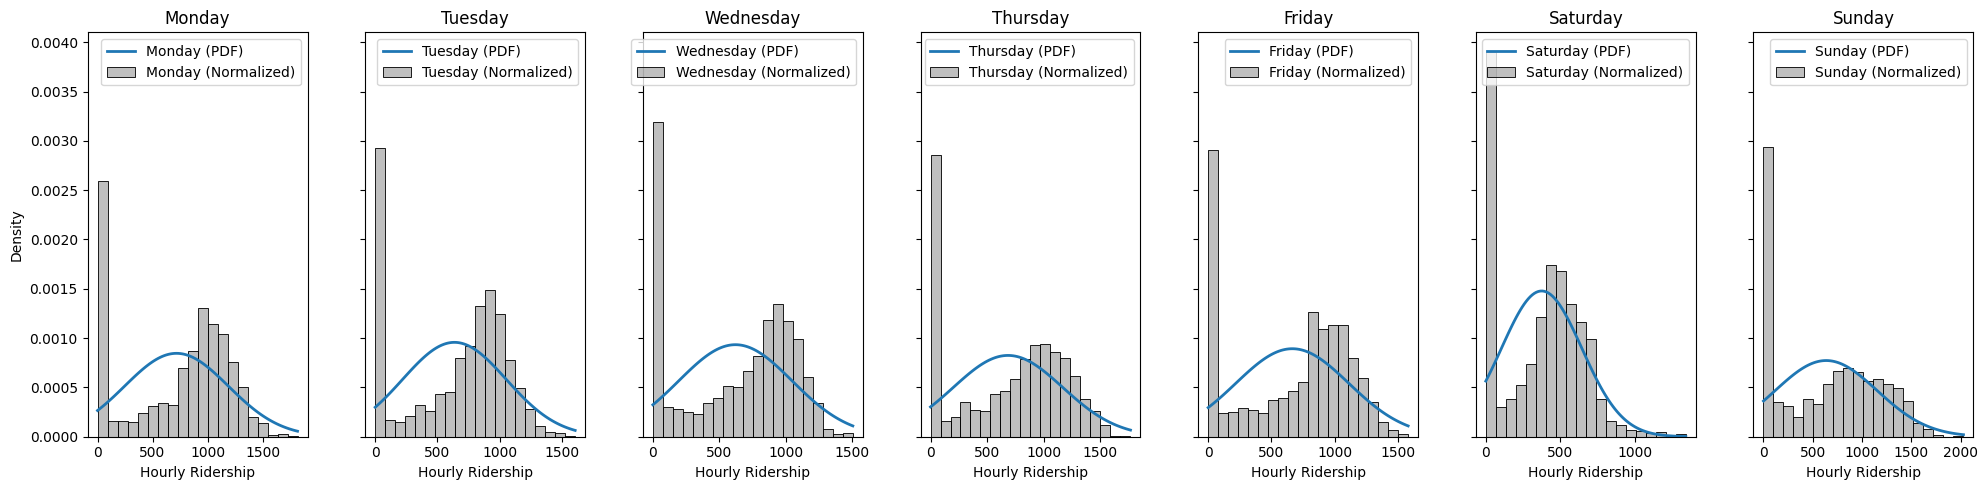

             Significant
Day of Week             
Monday              True
Tuesday            False
Wednesday          False
Thursday            True
Friday              True
Saturday            True
Sunday             False


In [815]:
# plots if I need to show each day of the week PDF plots and statistical significance between each day PDF and all remaining days of the week

# Create a new column 'Weekday' to identify if it's a weekday or weekend
merged_df['Weekday'] = merged_df['DOW'].isin([0, 1, 2, 3, 4])

# Create a dictionary to map numerical days to their names
days_of_week = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Standardize the data
merged_df['vehicle_count_standardized'] = (merged_df['vehicle_count'] - merged_df['vehicle_count'].mean()) / merged_df['vehicle_count'].std()

# Create a single row of seven subplots
fig, axs = plt.subplots(1, 7, figsize=(20, 5), sharey=True)

# Plot probability density functions and normalized frequencies for each day of the week
for day, ax in zip(range(7), axs):
    current_day_data = merged_df[merged_df['DOW'] == day]['vehicle_count']
    
    # Calculate the probability density function using norm.pdf
    x = np.linspace(current_day_data.min(), current_day_data.max(), 100)
    pdf_values = norm.pdf(x, current_day_data.mean(), current_day_data.std())
    
    # Plot the PDF
    ax.plot(x, pdf_values, label=f'{days_of_week[day]} (PDF)', linewidth=2)
    
    # Plot normalized frequencies as bar plots
    sns.histplot(current_day_data, bins=20, kde=False, ax=ax, label=f'{days_of_week[day]} (Normalized)', alpha=0.5, color='gray', stat='density')
    
    ax.set_title(f'{days_of_week[day]}')
    ax.set_xlabel('Hourly Ridership')
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.show()

# Perform t-test for each day of the week against the rest
hypothesis_results = []

for day in range(7):
    current_day_data = merged_df[merged_df['DOW'] == day]['vehicle_count']
    rest_of_days_data = merged_df[merged_df['DOW'] != day]['vehicle_count']
    
    t_stat, p_value = ttest_ind(current_day_data, rest_of_days_data)
    hypothesis_results.append(p_value < 0.05)

# Create a table with the hypothesis testing results
result_table = pd.DataFrame(hypothesis_results, columns=['Significant'], index=days_of_week.values())
result_table.index.name = 'Day of Week'

# Display the result table
print(result_table)

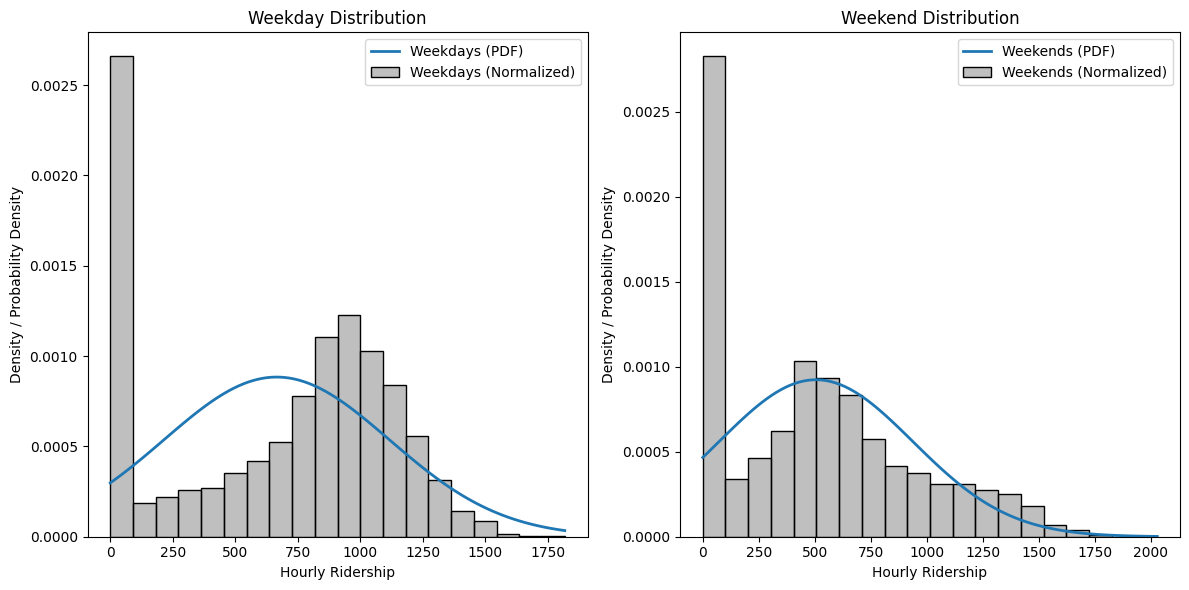

In [816]:
# Create a new column 'Weekday' to identify if it's a weekday or weekend
merged_df['Weekday'] = merged_df['DOW'].isin([0, 1, 2, 3, 4])

# Create a dictionary to map numerical days to their names
days_of_week = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Separate data for weekdays and weekends
weekday_data = merged_df[merged_df['Weekday']]['vehicle_count']
weekend_data = merged_df[~merged_df['Weekday']]['vehicle_count']

# Fit a normal distribution to the data
weekday_mean, weekday_std = norm.fit(weekday_data)
weekend_mean, weekend_std = norm.fit(weekend_data)

# Plot the PDF and normalized values for weekdays
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
x_weekday = np.linspace(weekday_data.min(), weekday_data.max(), 100)
pdf_values_weekday = norm.pdf(x_weekday, weekday_mean, weekday_std)
plt.plot(x_weekday, pdf_values_weekday, label='Weekdays (PDF)', linewidth=2)

# Plot normalized frequencies as bar plots for weekdays
sns.histplot(weekday_data, bins=20, kde=False, label='Weekdays (Normalized)', alpha=0.5, color='gray', stat='density')

plt.title('Weekday Distribution')
plt.xlabel('Hourly Ridership')
plt.ylabel('Density / Probability Density')
plt.legend()

# Plot the PDF and normalized values for weekends
plt.subplot(1, 2, 2)
x_weekend = np.linspace(weekend_data.min(), weekend_data.max(), 100)
pdf_values_weekend = norm.pdf(x_weekend, weekend_mean, weekend_std)
plt.plot(x_weekend, pdf_values_weekend, label='Weekends (PDF)', linewidth=2)

# Plot normalized frequencies as bar plots for weekends
sns.histplot(weekend_data, bins=20, kde=False, label='Weekends (Normalized)', alpha=0.5, color='gray', stat='density')

plt.title('Weekend Distribution')
plt.xlabel('Hourly Ridership')
plt.ylabel('Density / Probability Density')
plt.legend()

plt.tight_layout()
plt.show()

In [817]:
#statistical significance between PDFs of all days of the week

# Create a dictionary to map numerical days to their names
days_of_week = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Initialize a 7x7 matrix to store statistical significance results
stat_significance_matrix = np.zeros((7, 7), dtype=bool)

# Compare the distribution of each day with all other days
for day1 in range(7):
    for day2 in range(7):
        if day1 != day2:
            day1_data = merged_df[merged_df['DOW'] == day1]['vehicle_count']
            day2_data = merged_df[merged_df['DOW'] == day2]['vehicle_count']
            
            # Perform t-test
            t_stat, p_value = ttest_ind(day1_data, day2_data)
            
            # Check for statistical significance
            stat_significance_matrix[day1, day2] = p_value < 0.05

# Create a DataFrame from the significance matrix
significance_df = pd.DataFrame(stat_significance_matrix, columns=days_of_week.values(), index=days_of_week.values())

# Display the 7x7 dataset indicating statistical significance
print("Statistical Significance Matrix:")
significance_df.head()

Statistical Significance Matrix:


,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Monday,False,True,True,False,True,True,True
Tuesday,True,False,False,True,False,True,False
Wednesday,True,False,False,True,True,True,False
Thursday,False,True,True,False,False,True,True
Friday,True,False,True,False,False,True,False


### Q3(5pts).  Plot the timeline of the `vehicle_count` and `arrivals` for the month having the highest taxi ridership (the sum of vehicle count in the whole month). As `arrivals` and `vehicle_count` have different scales, standardize each dataset first.

C:\Users\omide\AppData\Local\Temp\ipykernel_3552\1597836210.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highest_month_df[['vehicle_count', 'arrivals']] = scaler.fit_transform(highest_month_df[['vehicle_count', 'arrivals']])


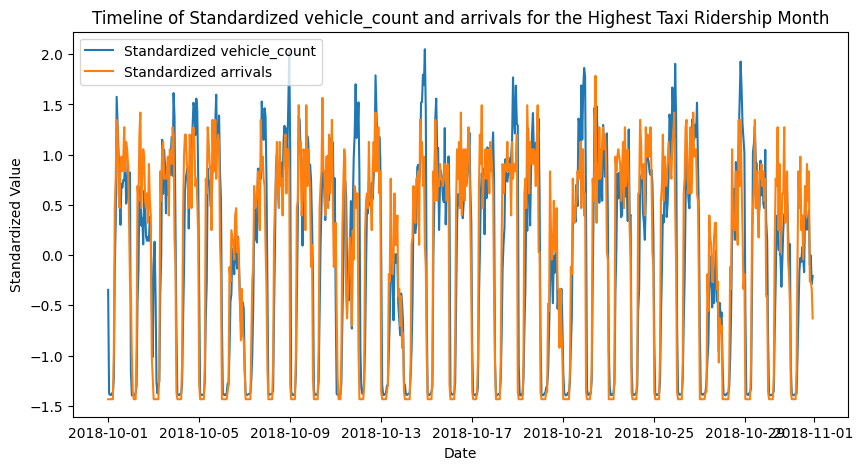

In [818]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Calculate the total vehicle count for each month
monthly_vehicle_count = merged_df.groupby(merged_df['Date'].dt.month)['vehicle_count'].sum()

# Find the month with the highest taxi ridership
highest_month = monthly_vehicle_count.idxmax()

# Filter the DataFrame for the highest month
highest_month_df = merged_df[merged_df['Date'].dt.month == highest_month]

# Standardize the 'vehicle_count' and 'arrivals' columns
scaler = StandardScaler()
highest_month_df[['vehicle_count', 'arrivals']] = scaler.fit_transform(highest_month_df[['vehicle_count', 'arrivals']])

# Plot the timeline
plt.figure(figsize=(10, 5))
plt.plot(highest_month_df['Date'], highest_month_df['vehicle_count'], label='Standardized vehicle_count')
plt.plot(highest_month_df['Date'], highest_month_df['arrivals'], label='Standardized arrivals')
plt.title('Timeline of Standardized vehicle_count and arrivals for the Highest Taxi Ridership Month')
plt.xlabel('Date')
plt.ylabel('Standardized Value')
plt.legend()
plt.show()

## Task 4: Build Linear Regression Model of FHV and taxi ridership vs Arrivals data (35pts - 5pts each except of Q5 - 10 pts)

### Q1. split the data into training, validation and test samples (first 90 days for training, next 180 for validation, last 90 for test)


In [819]:
#since we have 12 lags the first 12 data rows are not complete so I decide to omited them.
dataTrain=merged_df.iloc[13:24*90+13,:]
dataValid=merged_df.iloc[24*90+13:24*(90+180)+13,:]
dataTest=merged_df.iloc[24*(90+180)+13:,:]
dataTest.head(24*365)

,Date,vehicle_count,arrivals,arrivals_lag_1,arrivals_lag_2,arrivals_lag_3,arrivals_lag_4,arrivals_lag_5,arrivals_lag_6,arrivals_lag_7,arrivals_lag_8,arrivals_lag_9,arrivals_lag_10,arrivals_lag_11,arrivals_lag_12,DOW,Hour,Weekday,vehicle_count_standardized
6493,2018-09-28 13:00:00,902.0,32,34.0,24.0,32.0,32.0,32.0,27.0,5.0,0.0,0.0,0.0,0.0,0.0,4,13,True,0.624141
6494,2018-09-28 14:00:00,1222.0,29,32.0,34.0,24.0,32.0,32.0,32.0,27.0,5.0,0.0,0.0,0.0,0.0,4,14,True,1.332306
6495,2018-09-28 15:00:00,1148.0,32,29.0,32.0,34.0,24.0,32.0,32.0,32.0,27.0,5.0,0.0,0.0,0.0,4,15,True,1.168543
6496,2018-09-28 16:00:00,1323.0,36,32.0,29.0,32.0,34.0,24.0,32.0,32.0,32.0,27.0,5.0,0.0,0.0,4,16,True,1.555821
6497,2018-09-28 17:00:00,1420.0,27,36.0,32.0,29.0,32.0,34.0,24.0,32.0,32.0,32.0,27.0,5.0,0.0,4,17,True,1.770483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-12-31 19:00:00,467.0,11,12.0,21.0,20.0,17.0,21.0,27.0,17.0,11.0,28.0,23.0,22.0,11.0,0,19,True,-0.338521
8756,2018-12-31 20:00:00,599.0,13,11.0,12.0,21.0,20.0,17.0,21.0,27.0,17.0,11.0,28.0,23.0,22.0,0,20,True,-0.046403
8757,2018-12-31 21:00:00,384.0,8,13.0,11.0,12.0,21.0,20.0,17.0,21.0,27.0,17.0,11.0,28.0,23.0,0,21,True,-0.522202
8758,2018-12-31 22:00:00,410.0,8,8.0,13.0,11.0,12.0,21.0,20.0,17.0,21.0,27.0,17.0,11.0,28.0,0,22,True,-0.464663


### Q2.  Build an OLS model

Build an OLS model with intercept (you may want to use smf.ols) over the training dataset using `arrivals` as a sole predictor for `vehicle_count`. Check p-value for `arrivals`. What does it indicate? Report the 99% confidence interval for arrivals's coefficient. Scatter plot for ridership and flight arrival, include the predictive line.

In [820]:
#perform a regression of the target variable against those three features we used to compute it
lm = smf.ols(formula = 'arrivals ~ vehicle_count', data = dataTrain).fit()
OLS_coef=lm.params
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               arrivals   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     5635.
Date:                Thu, 14 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:42:58   Log-Likelihood:                -7283.1
No. Observations:                2160   AIC:                         1.457e+04
Df Residuals:                    2158   BIC:                         1.458e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.8436      0.250     11.369

### the P value for both intercept and coefficient is 0 which shows zero probablity of no relation between arrivals and vehicle_count and suggests that the linear hyphothesis is true

In [821]:
# Get the 99% confidence interval for the coefficient of 'vehicle_count'
conf_interval = lm.conf_int(alpha=0.01)
# Print the confidence interval
print(f"99% Confidence Interval for 'vehicle_count' coefficient:\n{conf_interval}")

99% Confidence Interval for 'vehicle_count' coefficient:
                      0         1
Intercept      2.198760  3.488464
vehicle_count  0.026583  0.028473


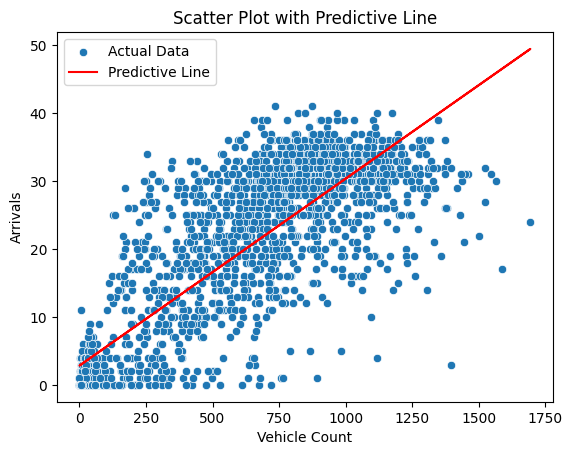

In [822]:
# Scatter plot with predictive line
sns.scatterplot(x='vehicle_count', y='arrivals', data=dataTrain, label='Actual Data')
plt.plot(dataTrain['vehicle_count'], lm.predict(dataTrain['vehicle_count']), color='red', label='Predictive Line')
plt.xlabel('Vehicle Count')
plt.ylabel('Arrivals')
plt.title('Scatter Plot with Predictive Line')
plt.legend()
plt.show()

### Q3. Consider Impact of immediate history of arrivals
by adding time lags - add all 12 lag variables into the regression above

There is always some delay between passengers arrival and departure (e.g. passing customs, picking up luggage, etc). `vehicle_count` might be more related to historical values of flight arrivals (lag) rather than immediate `arrivals`. Engineer a formula with all the following variables and run the regression:
* arrival, lag1, ..., lagN: that happens 1hr, ..., N=12 hr ahead.
Which of the variables have a statistically significant impact according to p-values?

In [823]:
lm = smf.ols(formula = 'arrivals ~ vehicle_count+arrivals_lag_1+arrivals_lag_2+arrivals_lag_3+arrivals_lag_4+arrivals_lag_5+\
                        arrivals_lag_6+arrivals_lag_7+arrivals_lag_8+arrivals_lag_9+arrivals_lag_10+arrivals_lag_11+arrivals_lag_12'\
             , data = dataTrain).fit()
OLS_coef=lm.params
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               arrivals   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     727.1
Date:                Thu, 14 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:42:58   Log-Likelihood:                -6847.7
No. Observations:                2160   AIC:                         1.372e+04
Df Residuals:                    2146   BIC:                         1.380e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.5362      0.336     

### If the p-value is less than your chosen significance level (e.g., 0.05), you reject the null hypothesis and conclude that the variable has a statistically significant impact. STATISTICALLY SIGNIFICANT VARIABLES ARE :


#### vehicle_count,arrivals_lag_1,arrivals_lag_2,arrivals_lag_3,arrivals_lag_4,arrivals_lag_6,arrivals_lag_7,arrivals_lag_10,arrivals_lag_11,arrivals_lag_12

### Q4: Incorporate Temporal Patterns

adding categorical variables for day of week and hour of the day.

From the visualization in task1Q3, you may see that both - taxi ridership as well as arrivals follow a somewhat periodic temporal pattern. Intuitively, this is true for most traffic flows following daily rhythms including rush hours, and also varying over the course of the week. Usually, we add dummy/categorical variables (Boolean variable: 1 for True and 0 for False) to encapsulate people's traveling patterns during different time periods.

Note that it would not make sense to add hour and dow as regular regressors as we can't anticipate their linear numeric impact. Instead, the expression `C(.)` or `pd.get_dummies` could be used in the regression formulae in order to treat those variables as categorical adding corresponding dummy variables to account for their possible discrete values.

Perform the regression of `vehicle_count` ridership against `arrivals`, lags, and temporal categorical variables.

In [824]:
dataTrain.head()

,Date,vehicle_count,arrivals,arrivals_lag_1,arrivals_lag_2,arrivals_lag_3,arrivals_lag_4,arrivals_lag_5,arrivals_lag_6,arrivals_lag_7,arrivals_lag_8,arrivals_lag_9,arrivals_lag_10,arrivals_lag_11,arrivals_lag_12,DOW,Hour,Weekday,vehicle_count_standardized
13,2018-01-01 13:00:00,550.0,20,14.0,18.0,30.0,15.0,14.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0,13,True,-0.154841
14,2018-01-01 14:00:00,765.0,25,20.0,14.0,18.0,30.0,15.0,14.0,5.0,0.0,0.0,0.0,0.0,1.0,0,14,True,0.320958
15,2018-01-01 15:00:00,865.0,20,25.0,20.0,14.0,18.0,30.0,15.0,14.0,5.0,0.0,0.0,0.0,0.0,0,15,True,0.542259
16,2018-01-01 16:00:00,776.0,24,20.0,25.0,20.0,14.0,18.0,30.0,15.0,14.0,5.0,0.0,0.0,0.0,0,16,True,0.345301
17,2018-01-01 17:00:00,1182.0,26,24.0,20.0,25.0,20.0,14.0,18.0,30.0,15.0,14.0,5.0,0.0,0.0,0,17,True,1.243785


In [825]:
# Generate the Hours dummy variables for train, validation, and test datasets
dataTrain = pd.get_dummies(dataTrain, columns=['Hour'], prefix='Hour', drop_first=False).astype('int64').astype('int32')
dataValid = pd.get_dummies(dataValid, columns=['Hour'], prefix='Hour', drop_first=False).astype('int64').astype('int32')
dataTest= pd.get_dummies(dataTest, columns=['Hour'], prefix='Hour', drop_first=False).astype('int64').astype('int32')

In [826]:
# Generate the day of the week dummy variables for train, validation, and test datasets
dataTrain = pd.get_dummies(dataTrain, columns=['DOW'], prefix='DOW', drop_first=False).astype('int64').astype('int32')
dataValid = pd.get_dummies(dataValid, columns=['DOW'], prefix='DOW', drop_first=False).astype('int64').astype('int32')
dataTest= pd.get_dummies(dataTest, columns=['DOW'], prefix='DOW', drop_first=False).astype('int64').astype('int32')

In [827]:
dataTrain.head()

,Date,vehicle_count,arrivals,arrivals_lag_1,arrivals_lag_2,arrivals_lag_3,arrivals_lag_4,arrivals_lag_5,arrivals_lag_6,arrivals_lag_7,...,Hour_21,Hour_22,Hour_23,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6
13,-677109760,550,20,14,18,30,15,14,5,0,...,0,0,0,1,0,0,0,0,0,0
14,140296192,765,25,20,14,18,30,15,14,5,...,0,0,0,1,0,0,0,0,0,0
15,957702144,865,20,25,20,14,18,30,15,14,...,0,0,0,1,0,0,0,0,0,0
16,1775108096,776,24,20,25,20,14,18,30,15,...,0,0,0,1,0,0,0,0,0,0
17,-1702453248,1182,26,24,20,25,20,14,18,30,...,0,0,0,1,0,0,0,0,0,0


In [828]:
columns = dataTrain.columns
print(columns)

Index(['Date', 'vehicle_count', 'arrivals', 'arrivals_lag_1', 'arrivals_lag_2',
       'arrivals_lag_3', 'arrivals_lag_4', 'arrivals_lag_5', 'arrivals_lag_6',
       'arrivals_lag_7', 'arrivals_lag_8', 'arrivals_lag_9', 'arrivals_lag_10',
       'arrivals_lag_11', 'arrivals_lag_12', 'Weekday',
       'vehicle_count_standardized', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3',
       'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10',
       'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16',
       'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22',
       'Hour_23', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6'],
      dtype='object')


In [829]:
# Perform the regression including lags, day of the week, and hour of the day
formula = 'arrivals ~ vehicle_count + arrivals_lag_1 + arrivals_lag_2 + arrivals_lag_3 + arrivals_lag_4 + arrivals_lag_5 +Hour_0+ \
                      arrivals_lag_6 + arrivals_lag_7 + arrivals_lag_8 + arrivals_lag_9 + arrivals_lag_10 + arrivals_lag_11 + arrivals_lag_12 + \
                      Hour_1+Hour_2+Hour_3+Hour_4+Hour_5+Hour_6+Hour_7+Hour_8+Hour_9+Hour_10+Hour_11+Hour_12+Hour_13+Hour_14+Hour_15+Hour_16+Hour_17\
                      +Hour_18+Hour_19+Hour_20+Hour_21+Hour_22+Hour_23+DOW_0+DOW_1+DOW_2+DOW_3+DOW_4+DOW_5+DOW_6'

lm = smf.ols(formula=formula, data=dataTrain).fit()

# Get the summary of the regression
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               arrivals   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     468.8
Date:                Thu, 14 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:42:59   Log-Likelihood:                -6151.2
No. Observations:                2160   AIC:                         1.239e+04
Df Residuals:                    2117   BIC:                         1.263e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.9029      0.298     

### Q5. Perform feature selection for lag variables (10pts)
As you may see not all the lag variables have a statistically significant impact on the regression. Maybe some of them are not really relevant?
Try different amounts of lag variables m=0,1,...,12 (include m most recent arrival volumes/lags) using a loop for training the above regression over the training sample, report and plot the out-of-sample R2 over the validation sample as the function of m and pick the m which maximizes it. Evaluate the final regression over the test sample.

In [830]:
# The auxiliary function implementing regression based on the selected subset of features
def AdjR2(flag):
    '''
    Evaluate the model with adjusted R-squared,
    with flag indicating the feature selection
    1--feature included
    0--feature excluded
    '''
    formstr='arrivals ~ vehicle_count+Hour_0+ \
                        Hour_1+Hour_2+Hour_3+Hour_4+Hour_5+Hour_6+Hour_7+Hour_8+Hour_9+Hour_10+Hour_11+Hour_12+Hour_13+Hour_14+Hour_15+Hour_16+Hour_17\
                      +Hour_18+Hour_19+Hour_20+Hour_21+Hour_22+Hour_23+DOW_0+DOW_1+DOW_2+DOW_3+DOW_4+DOW_5+DOW_6'
    for i in range(len(flag)):
        if flag[i]==1:
            formstr += '+arrivals_lag_%d'%(i+1) # Construct the regression formula based on flag
    lm = smf.ols(formula = formstr, data = dataTrain).fit()
    lmy = lm.predict(dataValid)
    R2_valid=r2_score(lmy, dataValid.arrivals)
    lmy = lm.predict(dataTrain)
    R2_train=r2_score(lmy, dataTrain.arrivals)
    
    return lm,  R2_valid,R2_train,

In [831]:
#implement the regression with out-of-sample evaluation for different numbers of features included 
tainR2 = []
validR2 = []
TestR2 = []
n=13

for i in range(1, n):
    lm,  R2_valid,R2_train = AdjR2([1]*i + [0]*(n-i))
    tainR2.append(R2_train)
    validR2.append(R2_valid)


Text(0, 0.5, 'R2')

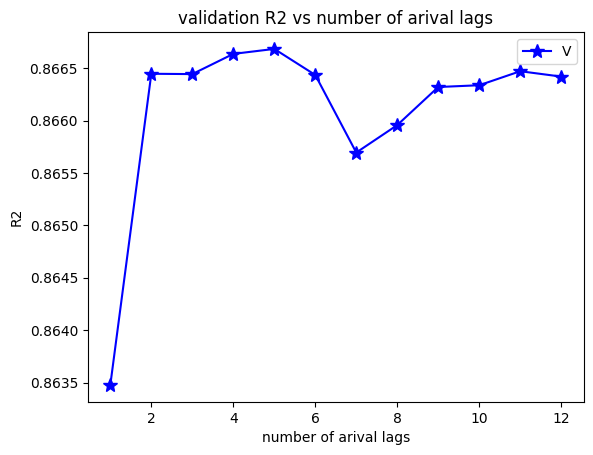

In [832]:
# In sample R2
plt.plot(range(1, n), validR2, 'b-*', markersize = 10)
plt.legend(('Validation set  R2'))
plt.title('validation R2 vs number of arival lags')
plt.xlabel('number of arival lags')
plt.ylabel('R2')

### the best accuracy happens when we incorporate the first 5 lags

In [833]:
# checking the best model accuracy on training, validation and test datasets
formula = 'arrivals ~vehicle_count+ \
                      arrivals_lag_1 + arrivals_lag_2 + arrivals_lag_3 + arrivals_lag_4+ arrivals_lag_5+\
                      Hour_0++Hour_1+Hour_2+Hour_3+Hour_4+Hour_5+Hour_6+Hour_7+Hour_8+Hour_9+Hour_10+Hour_11+Hour_12+Hour_13+Hour_14+Hour_15+Hour_16+Hour_17\
                      +Hour_18+Hour_19+Hour_20+Hour_21+Hour_22+Hour_23+DOW_0+DOW_1+DOW_2+DOW_3+DOW_4+DOW_5+DOW_6'
lm = smf.ols(formula=formula, data=dataTrain).fit()
lm.summary()
lmy = lm.predict(dataTrain)
R2_train=r2_score(lmy, dataTrain.arrivals)
lmy = lm.predict(dataValid)
R2_valid=r2_score(lmy, dataValid.arrivals)
lmy = lm.predict(dataTest)
R2_test=r2_score(lmy, dataTest.arrivals)
print("Train R2:", R2_train)
print("Validation R2:", R2_valid)
print("Test R2:", R2_test)


Train R2: 0.890355286722317
Validation R2: 0.8666828409349924
Test R2: 0.8872133075617099


In [834]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               arrivals   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     553.5
Date:                Thu, 14 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:43:01   Log-Likelihood:                -6170.2
No. Observations:                2160   AIC:                         1.241e+04
Df Residuals:                    2124   BIC:                         1.262e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.4766      0.265      9.361      0.000       1.958       2.995
vehicle_count      0.0105      0.001     15.975      0.000       0.009       0.012
arrivals_lag_1     0.3188      0.023     13.777      0.000       0.273       0.364
arrivals_lag_2     0.1846      0.023      7.952      0.000       0.139       0.230
arrivals_lag_3    -0.0110      0.023     -0.468      0.640      -0.057       0.035
arrivals_lag_4     0.0330      0.023      1.449      0.148      -0.012       0.078
arrivals_lag_5    -0.0104      0.020     -0.509      0.611      -0.050       0.030
Hour_0           -12.1068      0.489    -24.763      0.000     -13.066     -11.148
Hour_1            -7.1517      0.576    -12.427      0.000      -8.280      -6.023
Hour_2            -3.8341      0.591     -6.486      0.000      -4.993      -2.675
Hour_3            -3.3143      0.575     -5.759      0.000      -4.443      -2.186
Hour_4            -2.8217      0.561     -5.029      0.000      -3.922      -1.721
Hour_5            -2.8680      0.519     -5.530      0.000      -3.885      -1.851
Hour_6            -1.4662      0.521     -2.813      0.005      -2.488      -0.444
Hour_7            13.1179      0.519     25.251      0.000      12.099      14.137
Hour_8             9.4899      0.589     16.114      0.000       8.335      10.645
Hour_9             5.7178      0.619      9.242      0.000       4.505       6.931
Hour_10            6.7500      0.627     10.765      0.000       5.520       7.980
Hour_11           -1.1757      0.614     -1.914      0.056      -2.380       0.029
Hour_12            0.2517      0.485      0.519      0.604      -0.700       1.203
Hour_13            4.0083      0.477      8.410      0.000       3.074       4.943
Hour_14            3.4669      0.479      7.235      0.000       2.527       4.407
Hour_15            2.9540      0.484      6.099      0.000       2.004       3.904
Hour_16            2.3431      0.467      5.017      0.000       1.427       3.259
Hour_17            0.9246      0.472      1.961      0.050      -0.000       1.850
Hour_18            1.2163      0.473      2.572      0.010       0.289       2.144
Hour_19            0.1095      0.476      0.230      0.818      -0.823       1.042
Hour_20            0.1876      0.471      0.398      0.691      -0.737       1.112
Hour_21           -1.2632      0.490     -2.579      0.010      -2.224      -0.303
Hour_22           -5.5737      0.472    -11.797      0.000      -6.500      -4.647
Hour_23           -6.4856      0.483    -13.429      0.000      -7.433      -5.538
DOW_0              0.6441      0.246      2.619      0.009       0.162       1.126
DOW_1              0.9347      0.236      3.952      0.000       0.471       1.398
DOW_2              0.6395      0.227      2.821      0.005       0.195       1.084
DOW_3       

### Q6. Visualize temporal patterns and lag impacts through bar plots
For the best regression above visualize:
- bar plot of hour vs its impact (slope coefficient)
- bar plot of day of the week vs its impact coefficient
- bar plot of the lag (0 for immediate arrivals, 1,2,... for lags)

In [835]:
# Get the coefficients and their p-values
coefficients = lm.params
print(coefficients)

Intercept          2.476576
vehicle_count      0.010488
arrivals_lag_1     0.318831
arrivals_lag_2     0.184603
arrivals_lag_3    -0.010961
arrivals_lag_4     0.033022
arrivals_lag_5    -0.010356
Hour_0           -12.106849
Hour_1            -7.151737
Hour_2            -3.834059
Hour_3            -3.314253
Hour_4            -2.821661
Hour_5            -2.868032
Hour_6            -1.466166
Hour_7            13.117875
Hour_8             9.489882
Hour_9             5.717849
Hour_10            6.750010
Hour_11           -1.175726
Hour_12            0.251713
Hour_13            4.008291
Hour_14            3.466866
Hour_15            2.953975
Hour_16            2.343138
Hour_17            0.924618
Hour_18            1.216261
Hour_19            0.109477
Hour_20            0.187572
Hour_21           -1.263186
Hour_22           -5.573706
Hour_23           -6.485576
DOW_0              0.644056
DOW_1              0.934705
DOW_2              0.639535
DOW_3              0.635840
DOW_4              0

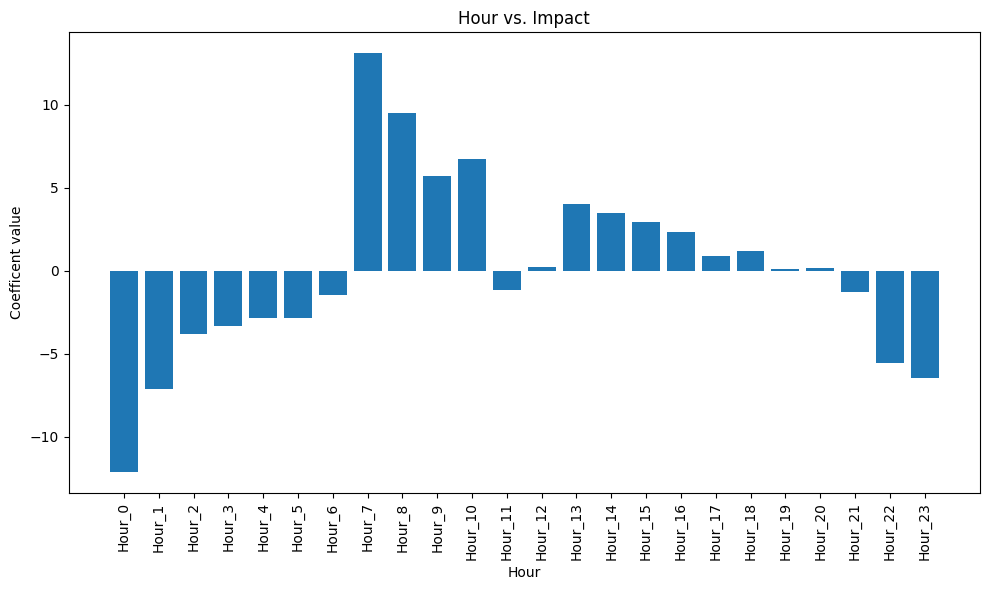

In [836]:
# Create a figure and axes
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

# Bar plot for hour vs. impact
axes.bar(coefficients.index[7:31], coefficients.values[7:31])

# Set X-axis labels and rotate them horizontally
axes.set_xticks(coefficients.index[7:31])
axes.set_xticklabels(coefficients.index[7:31], rotation=90)  # Adjust the rotation angle as needed

axes.set_title('Hour vs. Impact')
# Set labels for X and Y axes
axes.set_xlabel('Hour')
axes.set_ylabel('Coefficent value')
# Adjust layout and display the plot
plt.tight_layout()
plt.show()

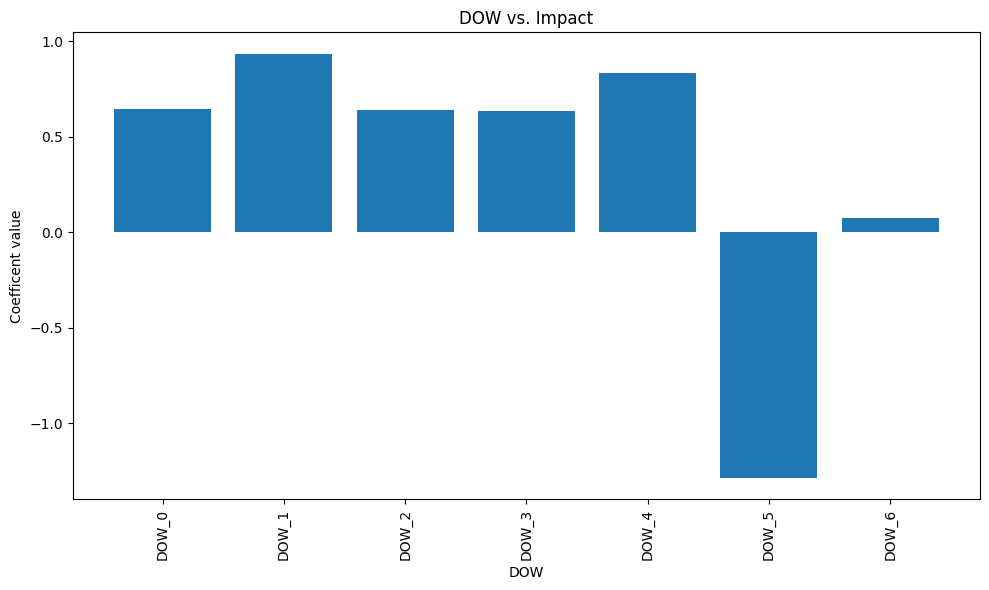

In [837]:
# Create a figure and axes
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

# Bar plot for hour vs. impact
axes.bar(coefficients.index[31:38], coefficients.values[31:38])

# Set X-axis labels and rotate them horizontally
axes.set_xticks(coefficients.index[31:38])
axes.set_xticklabels(coefficients.index[31:38], rotation=90)  # Adjust the rotation angle as needed

axes.set_title('DOW vs. Impact')
# Set labels for X and Y axes
axes.set_xlabel('DOW')
axes.set_ylabel('Coefficent value')
# Adjust layout and display the plot
plt.tight_layout()
plt.show()

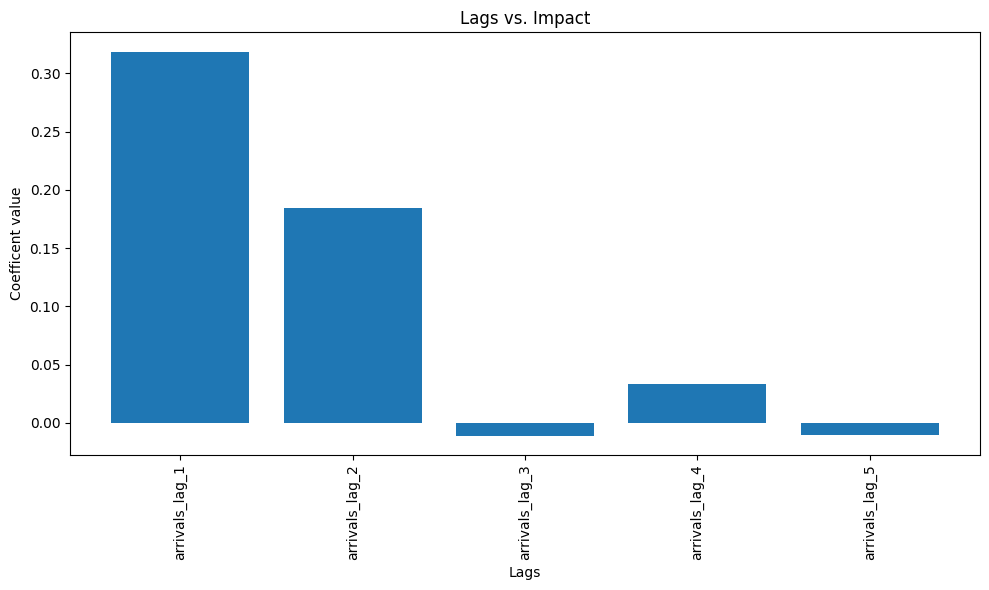

In [838]:
# Create a figure and axes
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

# Bar plot for hour vs. impact
axes.bar(coefficients.index[2:7], coefficients.values[2:7])

# Set X-axis labels and rotate them horizontally
axes.set_xticks(coefficients.index[2:7])
axes.set_xticklabels(coefficients.index[2:7], rotation=90)  # Adjust the rotation angle as needed

axes.set_title('Lags vs. Impact')
# Set labels for X and Y axes
axes.set_xlabel('Lags')
axes.set_ylabel('Coefficent value')
# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Task 5. Cluster the days of the year based on the relative timeline of their FHV and taxi departures from the airport (25pts - 5 pts each)

### Q1 (5pts). From the entire `dataset`, create a dataframe with days as rows, hours as columns and a) FHV, b)taxi departures for each hour as values (feel free to use pd.pivot_table). Normalize each row by the total daily ridership. Merge tables a) and b) horizontally

In [839]:
TaxiRidership.head()

,DOLocationID,Date,vehicle_count,DOW,Hour,day
0,1,2018-01-01,0.0,0,0,0
1,2,2018-01-01,0.0,0,0,0
2,3,2018-01-01,0.0,0,0,0
3,4,2018-01-01,0.0,0,0,0
4,5,2018-01-01,0.0,0,0,0


In [840]:
# Generate a dictionary for mappind day to DOW
agg_functions = {'vehicle_count': 'sum', 'DOW': 'mean'}
result = TaxiRidership.groupby(['day']).agg(agg_functions).reset_index()
day_to_dow_mapping = dict(zip(result['day'], result['DOW']))
print(day_to_dow_mapping)

{0: 0.0, 1: 1.0, 2: 2.0, 3: 3.0, 4: 4.0, 5: 5.0, 6: 6.0, 7: 0.0, 8: 1.0, 9: 2.0, 10: 3.0, 11: 4.0, 12: 5.0, 13: 6.0, 14: 0.0, 15: 1.0, 16: 2.0, 17: 3.0, 18: 4.0, 19: 5.0, 20: 6.0, 21: 0.0, 22: 1.0, 23: 2.0, 24: 3.0, 25: 4.0, 26: 5.0, 27: 6.0, 28: 0.0, 29: 1.0, 30: 2.0, 31: 3.0, 32: 4.0, 33: 5.0, 34: 6.0, 35: 0.0, 36: 1.0, 37: 2.0, 38: 3.0, 39: 4.0, 40: 5.0, 41: 6.0, 42: 0.0, 43: 1.0, 44: 2.0, 45: 3.0, 46: 4.0, 47: 5.0, 48: 6.0, 49: 0.0, 50: 1.0, 51: 2.0, 52: 3.0, 53: 4.0, 54: 5.0, 55: 6.0, 56: 0.0, 57: 1.0, 58: 2.0, 59: 3.0, 60: 4.0, 61: 5.0, 62: 6.0, 63: 0.0, 64: 1.0, 65: 2.0, 66: 3.0, 67: 4.0, 68: 5.0, 69: 6.0, 70: 0.0, 71: 1.0, 72: 2.0, 73: 3.0, 74: 4.0, 75: 5.0, 76: 6.0, 77: 0.0, 78: 1.0, 79: 2.0, 80: 3.0, 81: 4.0, 82: 5.0, 83: 6.0, 84: 0.0, 85: 1.0, 86: 2.0, 87: 3.0, 88: 4.0, 89: 5.0, 90: 6.0, 91: 0.0, 92: 1.0, 93: 2.0, 94: 3.0, 95: 4.0, 96: 5.0, 97: 6.0, 98: 0.0, 99: 1.0, 100: 2.0, 101: 3.0, 102: 4.0, 103: 5.0, 104: 6.0, 105: 0.0, 106: 1.0, 107: 2.0, 108: 3.0, 109: 4.0, 110: 5.0,

In [841]:
# Group by day and hour
grouped_df = TaxiRidership.groupby(['day','Hour' ])['vehicle_count'].sum().reset_index()
grouped_df.head()

,day,Hour,vehicle_count
0,0,0,142.0
1,0,1,23.0
2,0,2,2.0
3,0,3,1.0
4,0,4,13.0


In [842]:
# Normalizing vehicle_count values
total_daily_ridership = grouped_df.groupby('day')['vehicle_count'].transform('sum')
grouped_df['normalized_vehicle_count'] = grouped_df['vehicle_count'] / total_daily_ridership
grouped_df.head()

,day,Hour,vehicle_count,normalized_vehicle_count
0,0,0,142.0,0.011312
1,0,1,23.0,0.001832
2,0,2,2.0,0.000159
3,0,3,1.0,0.000080
4,0,4,13.0,0.001036


In [843]:
# Pivot the DataFrame to reshape it
reshaped_df = grouped_df.pivot(index='day', columns='Hour', values='normalized_vehicle_count')
grouped_df.set_index('day', inplace=True)



In [844]:
# Display the reshaped DataFrame
reshaped_df. head(400)

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
0,0.011312,0.001832,0.000159,0.000080,0.001036,0.001036,0.001195,0.003664,0.019756,0.035290,...,0.060942,0.068908,0.061818,0.094161,0.064048,0.060942,0.059269,0.081654,0.095276,0.085956
1,0.053023,0.003352,0.001877,0.000134,0.000335,0.001073,0.001609,0.020177,0.036868,0.074876,...,0.059794,0.043572,0.054967,0.062140,0.065625,0.063011,0.054364,0.070251,0.069312,0.049269
2,0.055675,0.025525,0.001982,0.000248,0.000661,0.000991,0.003635,0.014538,0.043863,0.064183,...,0.057823,0.056831,0.074922,0.083512,0.071948,0.058896,0.041880,0.039650,0.046754,0.024864
3,0.248316,0.009259,0.001684,0.000842,0.008418,0.012626,0.036195,0.026094,0.026936,0.024411,...,0.057239,0.067340,0.033670,0.037879,0.024411,0.023569,0.017677,0.026936,0.031145,0.060606
4,0.033489,0.014192,0.002510,0.001298,0.000606,0.001211,0.003115,0.007961,0.007702,0.020076,...,0.051142,0.058757,0.062565,0.076411,0.076324,0.082208,0.077362,0.091295,0.065853,0.082814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.038981,0.008450,0.003544,0.000204,0.000273,0.001159,0.004089,0.011858,0.047295,0.058812,...,0.058539,0.065967,0.054927,0.067943,0.075508,0.077416,0.062355,0.041093,0.064195,0.045318
361,0.028664,0.040007,0.023785,0.004025,0.000854,0.000915,0.003964,0.012197,0.032689,0.046899,...,0.057998,0.059584,0.059950,0.058913,0.065561,0.061170,0.055315,0.071172,0.074038,0.043971
362,0.045037,0.009984,0.000287,0.000431,0.000359,0.002155,0.004597,0.008763,0.033329,0.043313,...,0.047694,0.070033,0.060623,0.062994,0.073696,0.068525,0.077719,0.075277,0.050998,0.054949


### Q2 (7pts). Try K-means with different numbers of clusters k=2..7, report average Silhouette score for each. Which k is the "optimal" from Silhouette's standpoint?

In [845]:
reshaped_df.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
0,0.011312,0.001832,0.000159,0.000080,0.001036,0.001036,0.001195,0.003664,0.019756,0.035290,...,0.060942,0.068908,0.061818,0.094161,0.064048,0.060942,0.059269,0.081654,0.095276,0.085956
1,0.053023,0.003352,0.001877,0.000134,0.000335,0.001073,0.001609,0.020177,0.036868,0.074876,...,0.059794,0.043572,0.054967,0.062140,0.065625,0.063011,0.054364,0.070251,0.069312,0.049269
2,0.055675,0.025525,0.001982,0.000248,0.000661,0.000991,0.003635,0.014538,0.043863,0.064183,...,0.057823,0.056831,0.074922,0.083512,0.071948,0.058896,0.041880,0.039650,0.046754,0.024864
3,0.248316,0.009259,0.001684,0.000842,0.008418,0.012626,0.036195,0.026094,0.026936,0.024411,...,0.057239,0.067340,0.033670,0.037879,0.024411,0.023569,0.017677,0.026936,0.031145,0.060606
4,0.033489,0.014192,0.002510,0.001298,0.000606,0.001211,0.003115,0.007961,0.007702,0.020076,...,0.051142,0.058757,0.062565,0.076411,0.076324,0.082208,0.077362,0.091295,0.065853,0.082814


In [846]:
# find the optimal number of clusters using silhouette score
range_n_clusters = [2, 3, 4, 5,6,7]
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(reshaped_df)
    #report average Silhouette score
    silhouette_avg = silhouette_score(reshaped_df, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.1892982498549995
For n_clusters =3, the average silhouette_score is :0.22075019362172071
For n_clusters =4, the average silhouette_score is :0.23329518409569272
For n_clusters =5, the average silhouette_score is :0.22181281070626388
For n_clusters =6, the average silhouette_score is :0.18365907072959353
For n_clusters =7, the average silhouette_score is :0.18480178899144897


### the highest one is acheived for k=5


### Q3 (8pts). Perform K-means with the optimal k from above. Report the number of occurrences of each day of the week within each of the clusters. How would you interpret the clusters based on that?
Hint: Create a dictionary of the cluster numbers corresponding to each day of the year, apply it adding a column "cluster" to the dataframe, and use pivot table with aggregation function `count` to collect the numbers above.

In [847]:
#the highest one is acheived for k=5
km = KMeans(n_clusters=5, random_state=324)
cluster_labels = km.fit_predict(reshaped_df)
reshaped_df['cluster_label']=cluster_labels

In [848]:
reshaped_df.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,cluster_label
day,,,,,,,,,,,,,,,,,,,,,
0,0.011312,0.001832,0.000159,0.000080,0.001036,0.001036,0.001195,0.003664,0.019756,0.035290,...,0.068908,0.061818,0.094161,0.064048,0.060942,0.059269,0.081654,0.095276,0.085956,3
1,0.053023,0.003352,0.001877,0.000134,0.000335,0.001073,0.001609,0.020177,0.036868,0.074876,...,0.043572,0.054967,0.062140,0.065625,0.063011,0.054364,0.070251,0.069312,0.049269,1
2,0.055675,0.025525,0.001982,0.000248,0.000661,0.000991,0.003635,0.014538,0.043863,0.064183,...,0.056831,0.074922,0.083512,0.071948,0.058896,0.041880,0.039650,0.046754,0.024864,2
3,0.248316,0.009259,0.001684,0.000842,0.008418,0.012626,0.036195,0.026094,0.026936,0.024411,...,0.067340,0.033670,0.037879,0.024411,0.023569,0.017677,0.026936,0.031145,0.060606,4
4,0.033489,0.014192,0.002510,0.001298,0.000606,0.001211,0.003115,0.007961,0.007702,0.020076,...,0.058757,0.062565,0.076411,0.076324,0.082208,0.077362,0.091295,0.065853,0.082814,3


In [849]:
# Add DOW to the dataset
reshaped_df = reshaped_df.reset_index()
reshaped_df['DOW'] = reshaped_df['day'].map(day_to_dow_mapping)
reshaped_df.head(10)

Hour,day,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,cluster_label,DOW
0,0,0.011312,0.001832,0.000159,0.000080,0.001036,0.001036,0.001195,0.003664,0.019756,...,0.061818,0.094161,0.064048,0.060942,0.059269,0.081654,0.095276,0.085956,3,0.0
1,1,0.053023,0.003352,0.001877,0.000134,0.000335,0.001073,0.001609,0.020177,0.036868,...,0.054967,0.062140,0.065625,0.063011,0.054364,0.070251,0.069312,0.049269,1,1.0
2,2,0.055675,0.025525,0.001982,0.000248,0.000661,0.000991,0.003635,0.014538,0.043863,...,0.074922,0.083512,0.071948,0.058896,0.041880,0.039650,0.046754,0.024864,2,2.0
3,3,0.248316,0.009259,0.001684,0.000842,0.008418,0.012626,0.036195,0.026094,0.026936,...,0.033670,0.037879,0.024411,0.023569,0.017677,0.026936,0.031145,0.060606,4,3.0
4,4,0.033489,0.014192,0.002510,0.001298,0.000606,0.001211,0.003115,0.007961,0.007702,...,0.062565,0.076411,0.076324,0.082208,0.077362,0.091295,0.065853,0.082814,3,4.0
5,5,0.073046,0.005329,0.000666,0.000222,0.006994,0.005218,0.004996,0.005773,0.019205,...,0.059725,0.077931,0.057948,0.062278,0.056727,0.051066,0.050178,0.055284,2,5.0
6,6,0.035994,0.007509,0.003836,0.000490,0.001959,0.004244,0.001551,0.002775,0.010366,...,0.071335,0.065051,0.076396,0.087251,0.061949,0.088557,0.084966,0.081048,3,6.0
7,7,0.050706,0.003319,0.003936,0.000386,0.000695,0.001003,0.002007,0.025237,0.048700,...,0.058810,0.053022,0.047310,0.036891,0.047773,0.060739,0.074863,0.070695,1,0.0
8,8,0.056975,0.003316,0.000678,0.000301,0.000377,0.000377,0.000829,0.022006,0.037305,...,0.060216,0.057578,0.061647,0.061271,0.070239,0.066546,0.043033,0.057050,1,1.0
9,9,0.009192,0.000242,0.000242,0.000081,0.000323,0.000887,0.001048,0.024190,0.033220,...,0.074343,0.061039,0.073375,0.078455,0.063296,0.078616,0.057894,0.054749,0,2.0


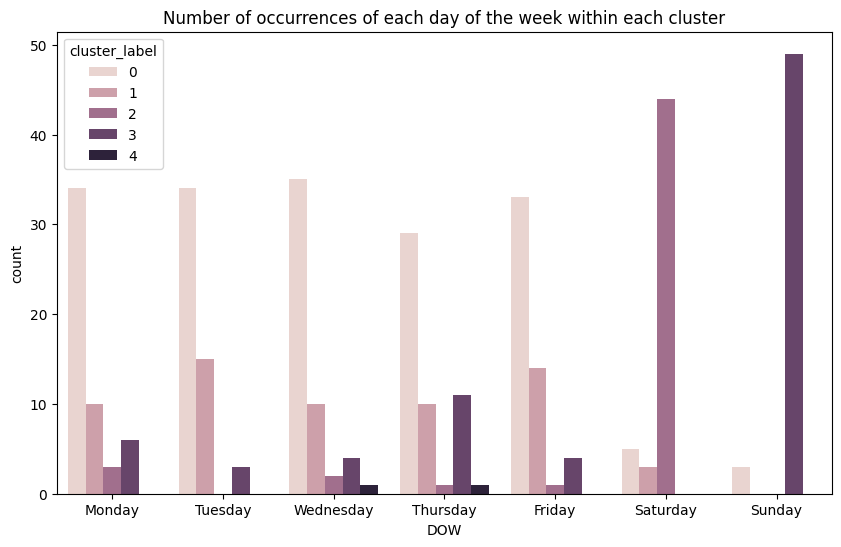

In [850]:
#count the number occurrence of each day of the week in each cluster
result = reshaped_df.groupby(['cluster_label', 'DOW']).size().reset_index(name='count')
# Map numerical DOW to day names
result['DOW'] = result['DOW'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='DOW', y='count', hue='cluster_label', data=result)
plt.title('Number of occurrences of each day of the week within each cluster')
plt.show()

## the plot shows that each cluster has its own combination of the days of the week and the disticntion of days weekdays and weekends is much greater that is why Saturday and Sunday have the most frequency in cluster labels 3 and 4, so it is possible to find days of the week and more robustly weekends and weekdays based on clustering the departures of taxis from LGA in different hours.

### Q4 (5pts). Visualize the hourly timeline for each cluster, and normalize by total riderships in the cluster.
Hint: Use the pivot table to collect total riders per hour of the day within each cluster for visualization (after appropriate normalization by the grand total).

In [851]:
# mapping days to their culster labels 
day_to_label_mapping = dict(zip(reshaped_df['day'], reshaped_df['cluster_label']))
print (day_to_label_mapping)

{0: 3, 1: 1, 2: 2, 3: 4, 4: 3, 5: 2, 6: 3, 7: 1, 8: 1, 9: 0, 10: 0, 11: 3, 12: 2, 13: 3, 14: 3, 15: 0, 16: 3, 17: 3, 18: 0, 19: 2, 20: 3, 21: 0, 22: 0, 23: 0, 24: 3, 25: 0, 26: 2, 27: 3, 28: 0, 29: 0, 30: 0, 31: 3, 32: 3, 33: 2, 34: 3, 35: 0, 36: 0, 37: 3, 38: 1, 39: 0, 40: 2, 41: 3, 42: 1, 43: 0, 44: 0, 45: 3, 46: 0, 47: 2, 48: 3, 49: 3, 50: 0, 51: 0, 52: 3, 53: 1, 54: 2, 55: 3, 56: 0, 57: 0, 58: 0, 59: 0, 60: 2, 61: 0, 62: 3, 63: 0, 64: 0, 65: 1, 66: 0, 67: 0, 68: 0, 69: 3, 70: 0, 71: 3, 72: 0, 73: 0, 74: 0, 75: 2, 76: 3, 77: 0, 78: 0, 79: 4, 80: 3, 81: 1, 82: 2, 83: 3, 84: 0, 85: 0, 86: 0, 87: 3, 88: 0, 89: 2, 90: 3, 91: 3, 92: 0, 93: 3, 94: 0, 95: 0, 96: 2, 97: 3, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 2, 104: 3, 105: 1, 106: 1, 107: 0, 108: 3, 109: 1, 110: 2, 111: 3, 112: 0, 113: 0, 114: 3, 115: 1, 116: 0, 117: 2, 118: 3, 119: 0, 120: 0, 121: 0, 122: 0, 123: 1, 124: 2, 125: 3, 126: 0, 127: 0, 128: 0, 129: 0, 130: 1, 131: 2, 132: 3, 133: 0, 134: 1, 135: 1, 136: 0, 137: 0, 138: 

In [852]:
# group the dataset by day and hour 
grouped_df = TaxiRidership.groupby(['day','Hour' ])['vehicle_count'].sum().reset_index()
grouped_df['cluster_label'] = grouped_df['day'].map(day_to_label_mapping)
grouped_df.head()

,day,Hour,vehicle_count,cluster_label
0,0,0,142.0,3
1,0,1,23.0,3
2,0,2,2.0,3
3,0,3,1.0,3
4,0,4,13.0,3


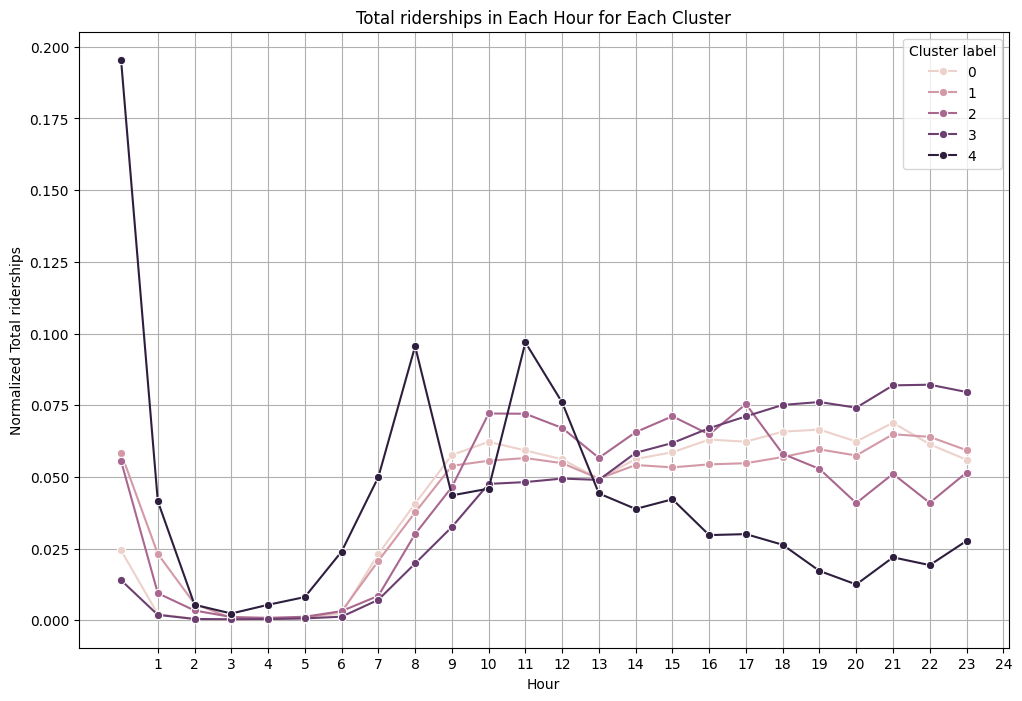

In [853]:
# Visualize the hourly timeline for each cluster

pivot_table = pd.pivot_table(grouped_df, values='vehicle_count', index=['cluster_label', 'Hour'], columns='day', aggfunc='sum', fill_value=0)
pivot_table['Total'] = pivot_table.sum(axis=1)
cluster_totals = pivot_table.groupby('cluster_label')['Total'].sum()
pivot_table['Total2'] = pivot_table['Total'] / cluster_totals

# Plotting with updated x-axis ticks
plt.figure(figsize=(12, 8))
sns.lineplot(data=pivot_table.reset_index(), x='Hour', y='Total2', hue='cluster_label', marker='o', ci=None)

# Set x-axis ticks to display all hours
plt.xticks(range(1, 25))

plt.title('Total riderships in Each Hour for Each Cluster')
plt.xlabel('Hour')
plt.ylabel('Normalized Total riderships')
plt.legend(title='Cluster label')
plt.grid(True)
plt.show()